In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

## **Load the dataset**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv")

# Melakukan standarisasi data (penting untuk clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## **Clustering K-Means dengan Elbow Method untuk menentukan jumlah k optimal**

In [ ]:
inertia = []  # Untuk menyimpan nilai inertia pada setiap k
silhouette_scores = []  # Untuk menyimpan nilai silhouette score pada setiap k
for k in range(2, 11):  # Menguji jumlah klaster mulai dari 2 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  # Melatih model KMeans
    inertia.append(kmeans.inertia_)  # Menyimpan inertia
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))  # Menyimpan silhouette score

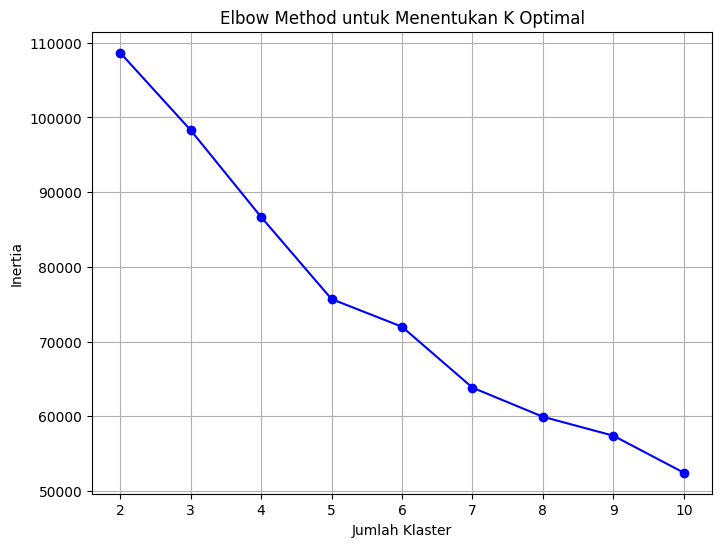

In [ ]:
# Grafik Elbow Method (Inertia vs Jumlah Klaster)
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', color='b')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



> Grafik Elbow Method ini menunjukkan hubungan yang jelas antara Jumlah Klaster dan Inertia. Inertia menggambarkan seberapa baik data dikelompokkan ke dalam klaster, dengan nilai yang lebih rendah menunjukkan pemisahan yang lebih baik. Pada grafik, terlihat bahwa penurunan inertia sangat tajam antara jumlah klaster 2 hingga 5, namun setelah itu penurunan menjadi lebih datar. Titik di mana penurunan inertia mulai melambat, yaitu pada jumlah klaster 5, menunjukkan bahwa jumlah klaster optimal untuk model ini adalah 5



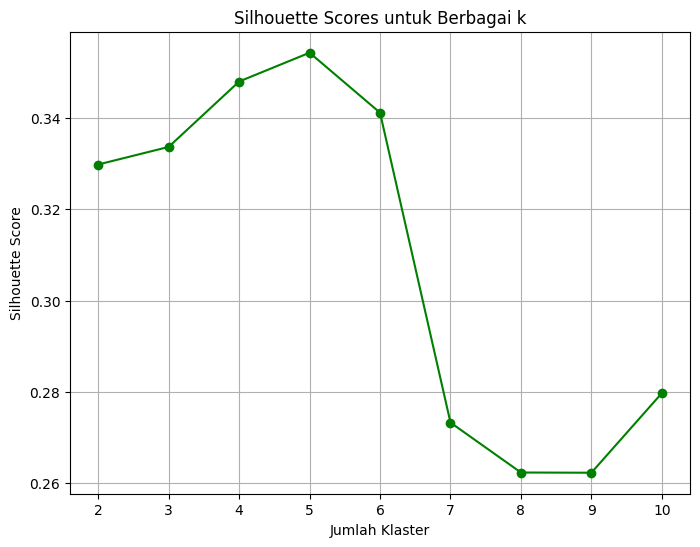

In [ ]:
# Grafik Silhouette Score untuk berbagai k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.title('Silhouette Scores untuk Berbagai k')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



> Grafik Silhouette Scores ini menunjukkan perbandingan antara Jumlah Klaster dan Silhouette Score. Nilai Silhouette Score menggambarkan seberapa baik setiap titik data dikelompokkan dalam klasternya, dengan nilai yang lebih tinggi menunjukkan pemisahan yang lebih baik antar klaster. Berdasarkan grafik ini, nilai Silhouette Score tertinggi tercatat pada jumlah klaster 5, yang menunjukkan bahwa pemisahan klaster pada titik ini paling optimal. Setelah jumlah klaster mencapai 5, nilai Silhouette Score mulai menurun tajam, dan semakin buruk pemisahan antar klaster. Dengan demikian, jumlah klaster yang optimal menurut Silhouette Score adalah 5, karena memberikan nilai Silhouette Score tertinggi.



In [ ]:
# Menentukan jumlah klaster optimal berdasarkan Elbow Method dan Silhouette Score
optimal_k = np.argmax(silhouette_scores) + 2  # Mengambil k yang memiliki nilai silhouette tertinggi
print(f'Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_k}')

# Melatih K-Means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

Jumlah klaster optimal berdasarkan Silhouette Score: 5


## **Clustering Hierarchical (Dendrogram)**

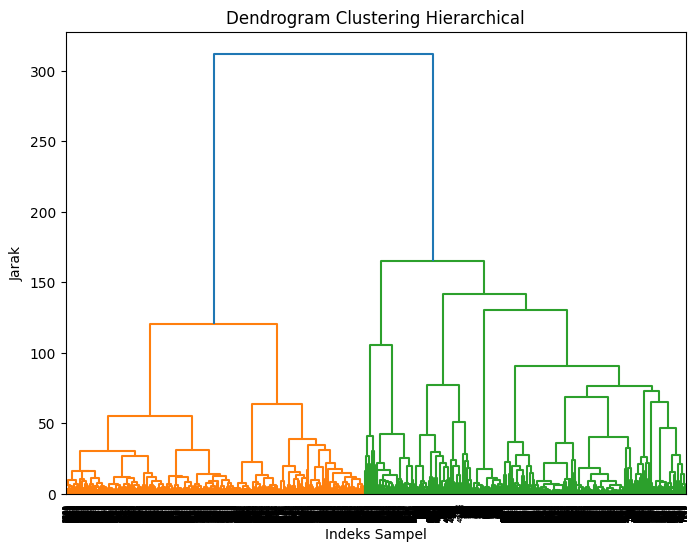

In [ ]:
linked = linkage(scaled_data, method='ward')  # Menggunakan metode Ward untuk linkage

# Membuat dendrogram untuk melihat pembentukan klaster
plt.figure(figsize=(8, 6))
dendrogram(linked)
plt.title('Dendrogram Clustering Hierarchical')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
plt.show()



> Grafik Dendrogram Clustering Hierarchical ini menunjukkan bagaimana sampel-sampel dikelompokkan berdasarkan kedekatannya. Setiap cabang yang bergabung mewakili klaster yang semakin besar, dengan jarak antara cabang menunjukkan seberapa jauh klaster-klaster tersebut.


## **Evaluasi Kualitas Clustering dengan Metrik**

In [ ]:
# Metrik untuk KMeans clustering
calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_labels)  # Calinski-Harabasz Index
davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)  # Davies-Bouldin Index
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)  # Silhouette Score untuk KMeans

# Menghitung Dunn Index (menggunakan fungsi kustom untuk Dunn Index)
def dunn_index(X, labels):
    from sklearn.metrics.pairwise import pairwise_distances
    clusters = np.unique(labels)
    cluster_distances = []
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            # Menghitung jarak antara klaster i dan j
            points_i = X[labels == clusters[i]]
            points_j = X[labels == clusters[j]]
            dist = pairwise_distances(points_i, points_j).min()  # Jarak minimum antar titik dari dua klaster
            cluster_distances.append(dist)
    return np.min(cluster_distances)

# Menampilkan hasil evaluasi untuk KMeans
dunn = dunn_index(scaled_data, kmeans_labels)
print(f'Calinski-Harabasz Index (K-Means): {calinski_harabasz:.4f}')
print(f'Davies-Bouldin Index (K-Means): {davies_bouldin:.4f}')
print(f'Silhouette Score (K-Means): {silhouette_kmeans:.4f}')
print(f'Dunn Index (K-Means): {dunn:.4f}')

Calinski-Harabasz Index (K-Means): 1961.8932
Davies-Bouldin Index (K-Means): 1.3474
Silhouette Score (K-Means): 0.3543
Dunn Index (K-Means): 0.4343


## **Model Clustering Tambahan: Gaussian Mixture Model (GMM)**

In [ ]:
gmm = GaussianMixture(n_components=optimal_k, random_state=42)  # Menentukan jumlah klaster untuk GMM
gmm_labels = gmm.fit_predict(scaled_data)  # Melatih model GMM

# Silhouette score untuk GMM
gmm_silhouette = silhouette_score(scaled_data, gmm_labels)

# Menghitung Dunn Index untuk GMM
dunn_gmm = dunn_index(scaled_data, gmm_labels)

# Menampilkan hasil evaluasi untuk GMM
print(f'Silhouette Score untuk GMM: {gmm_silhouette:.4f}')
print(f'Dunn Index untuk GMM: {dunn_gmm:.4f}')

Silhouette Score untuk GMM: 0.3017
Dunn Index untuk GMM: 0.5193


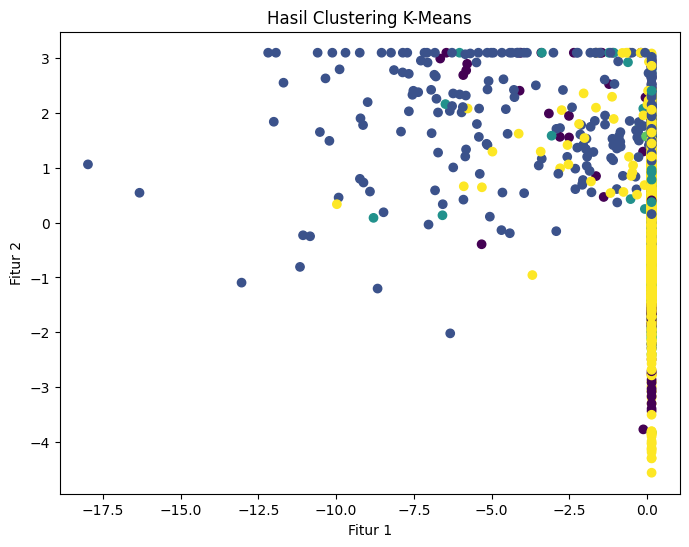

In [ ]:
# Plot Hasil Clustering K-Means
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')  # Memvisualisasikan hasil KMeans
plt.title('Hasil Clustering K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()



> Grafik Hasil Clustering K-Means ini menunjukkan bagaimana data dikelompokkan berdasarkan dua fitur utama, yaitu Fitur 1 dan Fitur 2. Setiap titik pada grafik mewakili sebuah data yang telah dimasukkan ke dalam klaster tertentu, dan warna yang berbeda menunjukkan klaster yang berbeda.



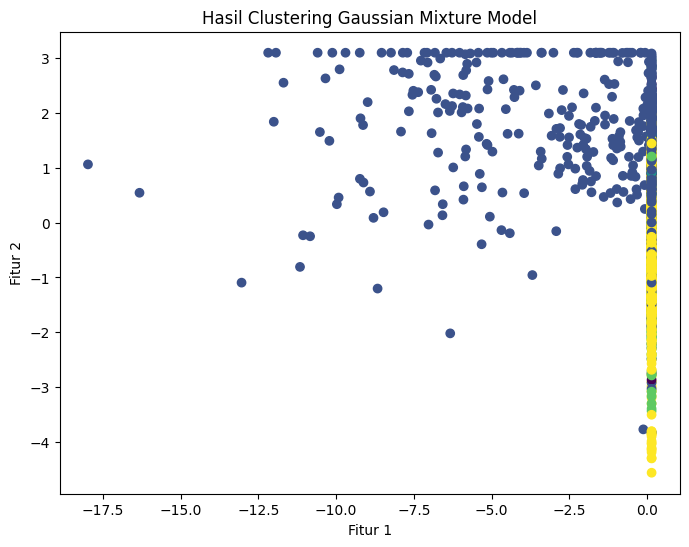

In [ ]:
# Plot Hasil Clustering GMM
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=gmm_labels, cmap='viridis')  # Memvisualisasikan hasil GMM
plt.title('Hasil Clustering Gaussian Mixture Model')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()



> Grafik Hasil Clustering Gaussian Mixture Model (GMM) ini menunjukkan hasil clustering dengan pendekatan probabilistik, di mana data dikelompokkan berdasarkan distribusi Gaussian yang berbeda. Berbeda dengan K-Means, GMM memungkinkan klaster yang lebih fleksibel, seperti elips, yang mencerminkan distribusi data yang lebih alami. Setiap titik diwarnai sesuai dengan klasternya, dan kita dapat melihat bagaimana GMM memisahkan data dengan lebih halus, menghasilkan klaster-klaster yang lebih kompleks dan berbentuk berbeda-beda, tergantung pada distribusi data tersebut.



# **Persamaan Matematika**

**1. K-Means Clustering:**

Pada K-Means, tujuannya adalah untuk meminimalkan Inertia (jumlah kuadrat jarak antara titik data dan pusat klaster). Inertia dihitung dengan persamaan berikut:
$$
\text{Inertia} = \sum_{i=1}^{n} \sum_{j=1}^{k} r_{ij} \cdot \| x_i - \mu_j \|^2
$$
  Di mana:

* ${n}$ adalah jumlah total data.
* ${k}$ adalah jumlah klaster.
* ${r_{ij}}$ adalah indikator yang menunjukkan apakah titik data 𝑥𝑖 berada pada klaster 𝑗 (nilai 1 jika ya, 0 jika tidak).
* ${\mu_j}$ adalah pusat klaster ke-𝑗.
* ${x_i}$ adalah titik data ke-𝑖.

**2. Silhouette Score:**

Silhouette Score digunakan untuk mengukur seberapa baik setiap titik data dikelompokkan dalam klasternya, dengan membandingkan jarak rata-rata ke titik lain dalam klaster dan jarak ke klaster terdekat. Rumusnya adalah:
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$
  Di mana:
* ${a(i)}$ adalah rata-rata jarak antara titik 𝑖 dan titik lainnya dalam klaster yang sama (internal cohesion).
* ${b(i)}$ adalah rata-rata jarak antara titik 𝑖 dan titik dari klaster terdekat (external cohesion).
* ${s(i)}$ adalah nilai Silhouette Score untuk titik 𝑖.

**3. Calinski-Harabasz Index (Variance Ratio Criterion):**

Indeks Calinski-Harabasz mengukur kualitas klaster dengan membandingkan variansi antar klaster dan dalam klaster. Rumusnya adalah:
$$
CH = \frac{tr(B_k)}{tr(W_k)} \times \frac{n-k}{k-1}
$$
  Di mana:
* ${tr(B_k)}$ adalah trace (jumlah diagonal) dari matriks dispersion antar-klaster.
* ${tr(W_k)} $ adalah trace dari matriks dispersion dalam-klaster.
* ${n}$ adalah jumlah titik data, dan
* ${k}$ adalah jumlah klaster.

**4. Davies-Bouldin Index:**

Indeks Davies-Bouldin mengukur kualitas klaster berdasarkan kesamaan antar klaster. Semakin kecil nilai Davies-Bouldin, semakin baik klaster tersebut. Rumusnya adalah:
$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$
  Di mana:
* ${s_i}$ adalah rata-rata jarak titik dalam klaster 𝑖 ke pusat klaster 𝑖.
* ${d_{ij}}$ adalah jarak antara pusat klaster 𝑖 dan 𝑗.
* ${k}$ adalah jumlah klaster.

**5. Dunn Index:**

Indeks Dunn mengukur pemisahan antara klaster dengan jarak minimum antar klaster, dibandingkan dengan diameter klaster. Semakin tinggi nilai Dunn, semakin baik pemisahan antar klaster. Rumusnya adalah:
$$
DI = \frac{\min_{i \neq j} \{ \text{jarak antar klaster} \}}{\max_{i} \{\text{diameter klaster}\}}
$$
  Di mana:
* Jarak antar klaster dihitung sebagai jarak minimum antara dua titik dari dua klaster yang berbeda.
* Diameter klaster dihitung sebagai jarak maksimum antara dua titik dalam klaster yang sama.

**6. Gaussian Mixture Model (GMM):**

Model GMM menggunakan distribusi Gaussian untuk mengklaster data. Proses ini melibatkan estimasi parameter distribusi dengan menggunakan Maximum Likelihood Estimation (MLE) dan Expectation-Maximization (EM). Meskipun tidak ada satu persamaan eksplisit dalam kode, GMM mengasumsikan bahwa data berasal dari campuran distribusi Gaussian yang terpisah. Fungsi distribusi probabilitas Gaussian adalah:
$$
\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left( -\frac{(x-\mu)^2}{2\sigma^2} \right)
$$
Di mana:
* ${x}$ adalah data.
* ${\mu}$ adalah rata-rata distribusi.
* ${\sigma^2}$ adalah varians distribusi.